In [24]:
import tensorflow as tf
import numpy as np
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from superpoint.settings import DATA_PATH, EXPER_PATH
from superpoint.radial_distortion.radial_dist_funct import distort,undistort
%matplotlib inline
%load_ext autoreload
%autoreload 2
tf.logging.set_verbosity(0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
image_name = 'COCO_train2014_000000519723.jpg' #'COCO_train2014_000000130745.jpg' #'COCO_train2014_000000000071.jpg' #'COCO_train2014_000000114404.jpg' #'COCO_train2014_000000151493.jpg' #
model_name = 'magic-point_synth'
base_path = Path(DATA_PATH, 'COCO/train2014/')
filename = Path(base_path, image_name)
checkpoint = Path(EXPER_PATH, model_name) 

In [26]:
image = tf.image.decode_jpeg(tf.read_file(str(filename)), channels=1)
image = tf.image.convert_image_dtype(image, tf.float32)
image = tf.to_float(tf.image.resize_images(image, [240, 320]))*255

Device mapping:

(1, 240, 320, 1)


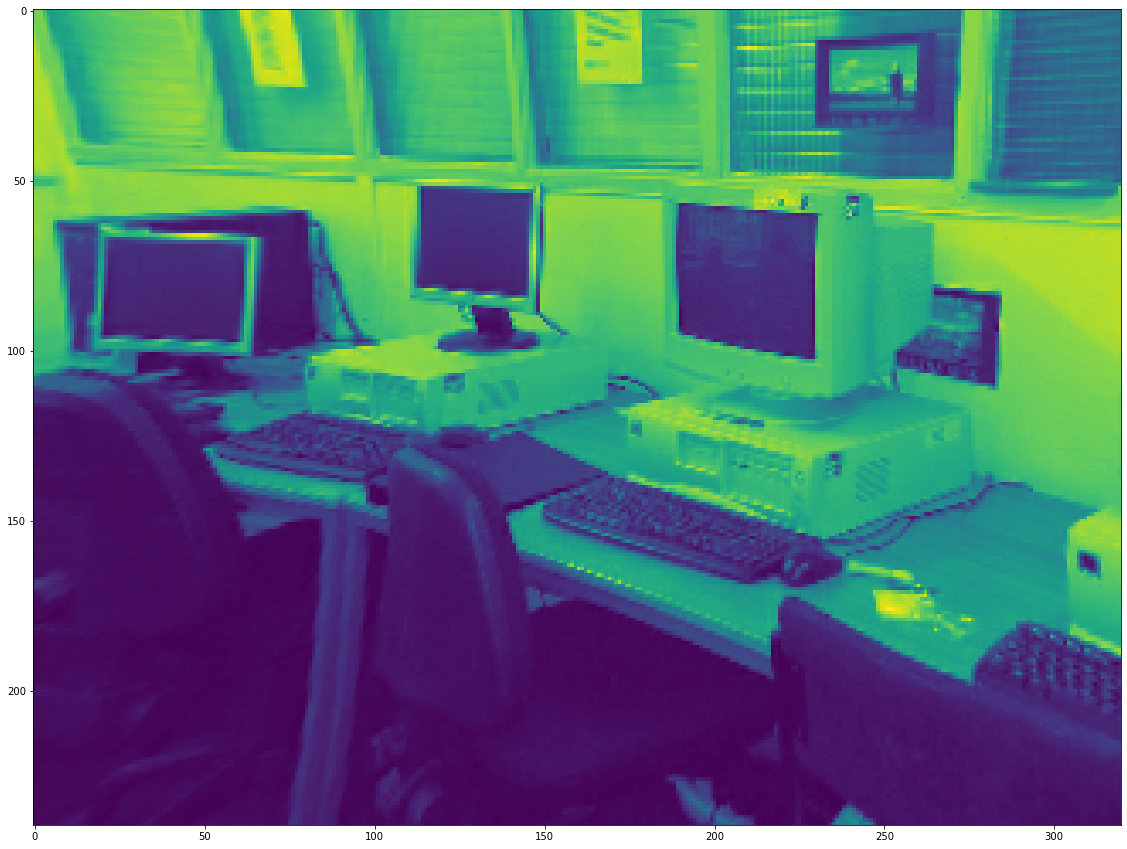

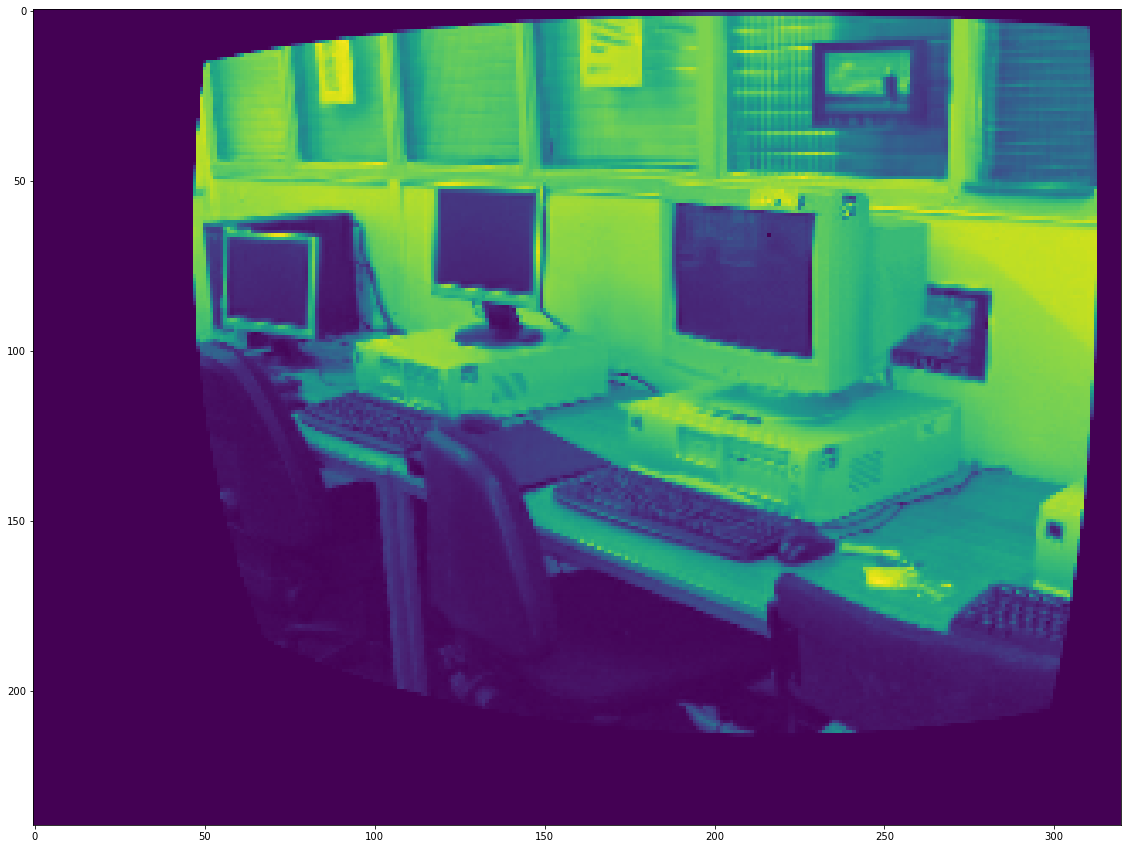

In [23]:
row_c = tf.random.uniform(shape=[], minval=0, maxval=tf.cast(240, tf.float32), dtype=tf.float32)
col_c = tf.random.uniform(shape=[], minval=0, maxval=tf.cast(320, tf.float32), dtype=tf.float32) 
lambda_ = 0.000006
d_image = distort(image[tf.newaxis,...],lambda_, (row_c,col_c))
u_image = undistort(d_image, lambda_, (row_c, col_c))

with tf.Session(config=tf.ConfigProto(allow_soft_placement=True,  log_device_placement=True)) as sess:
    dist,undist = sess.run([d_image, u_image])
    print(np.shape(undist))
    dist = np.reshape(dist,[240,320])
    undist = np.reshape(undist,[240,320])
    
    
    
    fig = plt.figure(figsize=(20, 15))
    fig.add_subplot(1,1,1)
    plt.imshow(dist)
    
    fig = plt.figure(figsize=(20, 15))
    fig.add_subplot(1,1,1)
    plt.imshow(undist)
